# Keras and Tensorflow > 2.0

https://www.youtube.com/watch?v=H6du_pfuznE

# Energy Consumption Prediction
<b>1. We will import the data - done! </b>

<b>2. Preprocess the data - done! </b> 

<b>3. Train, validation, and test - done!</b>
    
<b>4. Create a stacked LSTM model - done!</b>
    
<b>5. Predict the future 30 days and plot the output</b>

Timesteps != # of features

Timesteps is how many pieces of data used in one input window

Features is how many different column values 

# Step 1: Import the data

In [92]:
import tensorflow 
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
directory = '/Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/'
dataFiles = [f for f in listdir(directory) if isfile(join(directory, f))] 
for file in dataFiles:
    print(file)
    df = pd.read_csv(directory + file)

#for now, I will only use SF data 
location = '_SF'
df = pd.read_csv(directory + dataFiles[3])
df0 = pd.read_csv(directory + dataFiles[3])
df

SAC-NOAA-and-Megawatts.csv
SD-NOAA-and-Megawatts.csv
SD-yearAvg-NOAA-and-Megawatts.csv
SF-NOAA-and-Megawatts.csv
SAC-yearAvg-NOAA-and-Megawatts.csv
LA-yearAvg-NOAA-and-Megawatts.csv
LA-NOAA-and-Megawatts.csv
SF-yearAvg-NOAA-and-Megawatts.csv


,date,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,...,HLY_WCHL_NORMAL_SF,HLY_WIND_AVGSPD_SF,HLY_WIND_PCTCLM_SF,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Megawatts_2019
0,01-01T00:00:00,48.8,44.1,54.0,43.2,35.1,50.0,1020.1,1011.5,1026.9,...,47.3,6.3,25.4,196.0,1.1,5.0,14.7,4.0,14.3,283652.0
1,01-01T01:00:00,48.5,43.0,54.0,43.1,35.1,50.0,1019.9,1011.0,1026.8,...,47.0,6.2,28.5,193.0,1.2,4.0,14.6,5.0,13.1,252485.0
2,01-01T02:00:00,47.6,42.1,53.1,42.6,35.1,50.0,1020.0,1011.2,1026.8,...,46.0,6.2,26.5,184.0,0.9,4.0,14.8,6.0,12.5,245501.0
3,01-01T03:00:00,47.2,41.0,54.0,42.3,34.0,50.0,1020.0,1011.2,1026.9,...,45.5,6.2,24.9,178.0,1.1,4.0,16.3,5.0,13.5,241545.0
4,01-01T04:00:00,46.8,39.9,53.1,42.2,34.0,50.0,1019.8,1010.5,1026.6,...,45.0,5.9,27.9,175.0,0.8,4.0,15.6,7.0,11.2,241926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12-31T19:00:00,51.5,46.9,55.9,43.9,36.0,51.1,1019.5,1010.7,1026.4,...,50.3,7.7,17.8,255.0,1.9,7.0,22.4,4.0,14.0,308820.0
8756,12-31T20:00:00,51.0,46.0,55.0,43.6,36.0,51.1,1019.7,1011.2,1026.6,...,49.8,7.2,21.4,243.0,1.2,7.0,17.7,4.0,13.8,297758.0
8757,12-31T21:00:00,50.5,46.0,55.0,43.5,35.1,50.0,1019.9,1011.0,1026.8,...,49.1,7.1,18.7,218.0,1.3,7.0,18.7,4.0,16.5,287403.0
8758,12-31T22:00:00,49.8,45.0,54.0,43.4,35.1,50.0,1020.1,1011.5,1027.1,...,48.4,6.6,24.3,209.0,1.1,4.0,18.0,7.0,14.8,275322.0


In [94]:
df['date'] = pd.to_datetime(df['date'], format='%m-%dT%H:%M:%S')
df['date']= df["date"].map(lambda x: x.replace(year=2019))
df.index = df['date']
df

,date,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,...,HLY_WCHL_NORMAL_SF,HLY_WIND_AVGSPD_SF,HLY_WIND_PCTCLM_SF,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Megawatts_2019
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:00:00,48.8,44.1,54.0,43.2,35.1,50.0,1020.1,1011.5,1026.9,...,47.3,6.3,25.4,196.0,1.1,5.0,14.7,4.0,14.3,283652.0
2019-01-01 01:00:00,2019-01-01 01:00:00,48.5,43.0,54.0,43.1,35.1,50.0,1019.9,1011.0,1026.8,...,47.0,6.2,28.5,193.0,1.2,4.0,14.6,5.0,13.1,252485.0
2019-01-01 02:00:00,2019-01-01 02:00:00,47.6,42.1,53.1,42.6,35.1,50.0,1020.0,1011.2,1026.8,...,46.0,6.2,26.5,184.0,0.9,4.0,14.8,6.0,12.5,245501.0
2019-01-01 03:00:00,2019-01-01 03:00:00,47.2,41.0,54.0,42.3,34.0,50.0,1020.0,1011.2,1026.9,...,45.5,6.2,24.9,178.0,1.1,4.0,16.3,5.0,13.5,241545.0
2019-01-01 04:00:00,2019-01-01 04:00:00,46.8,39.9,53.1,42.2,34.0,50.0,1019.8,1010.5,1026.6,...,45.0,5.9,27.9,175.0,0.8,4.0,15.6,7.0,11.2,241926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2019-12-31 19:00:00,51.5,46.9,55.9,43.9,36.0,51.1,1019.5,1010.7,1026.4,...,50.3,7.7,17.8,255.0,1.9,7.0,22.4,4.0,14.0,308820.0
2019-12-31 20:00:00,2019-12-31 20:00:00,51.0,46.0,55.0,43.6,36.0,51.1,1019.7,1011.2,1026.6,...,49.8,7.2,21.4,243.0,1.2,7.0,17.7,4.0,13.8,297758.0
2019-12-31 21:00:00,2019-12-31 21:00:00,50.5,46.0,55.0,43.5,35.1,50.0,1019.9,1011.0,1026.8,...,49.1,7.1,18.7,218.0,1.3,7.0,18.7,4.0,16.5,287403.0


In [95]:
#8760 days, 28 features
df.shape

(8760, 28)

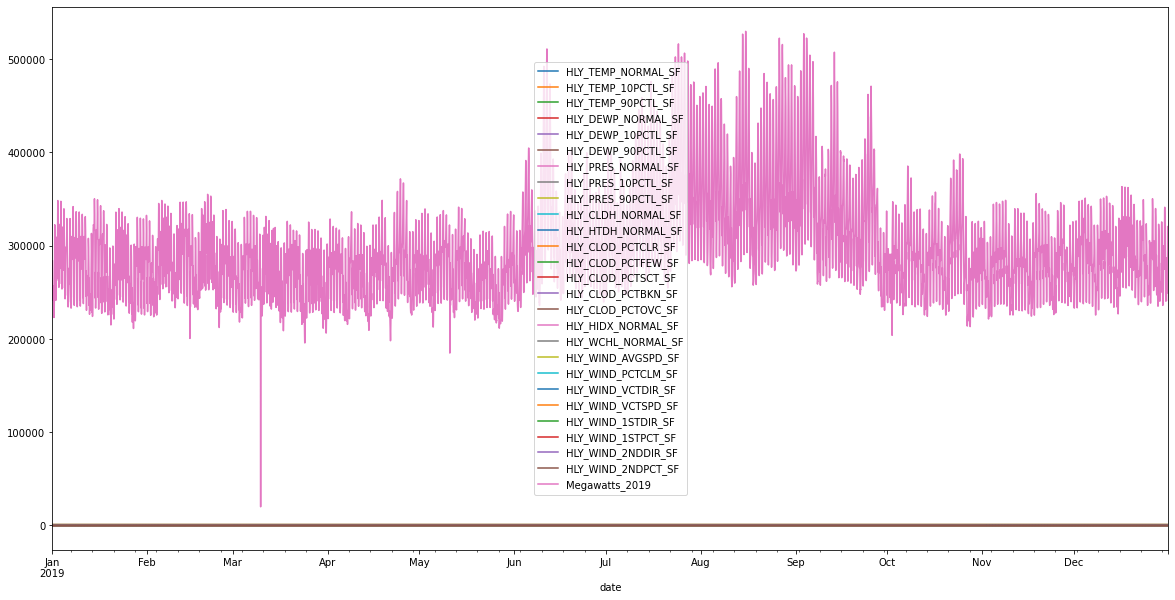

In [96]:
df.columns
df.plot(x = 'date', figsize=(20,10))
plt.show()

In [97]:
df.drop('date', axis=1, inplace=True)

# Step 2: Preprocess data

a. scale the data

b. circular time

### Scale down data 0->1?

LSTM are sensitive to the scale of the data. so we apply MinMax scaler to every column

In [98]:
from sklearn.preprocessing import MinMaxScaler
allScalers = []
def scaleAllData(df):
    for column in df.columns:
        df1 = df[column]
        scaler = MinMaxScaler(feature_range=(0,1))
        df[column] = scaler.fit_transform(np.array(df1.values.reshape(-1, 1)))
        allScalers.append(scaler)
    return df

In [99]:
df = scaleAllData(df)
df

,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,HLY_CLDH_NORMAL_SF,...,HLY_WCHL_NORMAL_SF,HLY_WIND_AVGSPD_SF,HLY_WIND_PCTCLM_SF,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Megawatts_2019
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.092664,0.188889,0.030201,0.131034,0.155,0.090909,0.816327,0.478261,0.862595,0.0,...,0.100719,0.088757,0.723647,0.543175,0.054455,0.571429,0.052863,0.428571,0.202667,0.517104
2019-01-01 01:00:00,0.081081,0.148148,0.030201,0.124138,0.155,0.090909,0.795918,0.405797,0.854962,0.0,...,0.089928,0.082840,0.811966,0.534819,0.059406,0.428571,0.051395,0.571429,0.170667,0.455968
2019-01-01 02:00:00,0.046332,0.114815,0.000000,0.089655,0.155,0.090909,0.806122,0.434783,0.854962,0.0,...,0.053957,0.082840,0.754986,0.509749,0.044554,0.428571,0.054332,0.714286,0.154667,0.442268
2019-01-01 03:00:00,0.030888,0.074074,0.030201,0.068966,0.100,0.090909,0.806122,0.434783,0.862595,0.0,...,0.035971,0.082840,0.709402,0.493036,0.054455,0.428571,0.076358,0.571429,0.181333,0.434508
2019-01-01 04:00:00,0.015444,0.033333,0.000000,0.062069,0.100,0.090909,0.785714,0.333333,0.839695,0.0,...,0.017986,0.065089,0.794872,0.484680,0.039604,0.428571,0.066079,0.857143,0.120000,0.435255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.196911,0.292593,0.093960,0.179310,0.200,0.181818,0.755102,0.362319,0.824427,0.0,...,0.208633,0.171598,0.507123,0.707521,0.094059,0.857143,0.165932,0.428571,0.194667,0.566473
2019-12-31 20:00:00,0.177606,0.259259,0.063758,0.158621,0.200,0.181818,0.775510,0.434783,0.839695,0.0,...,0.190647,0.142012,0.609687,0.674095,0.059406,0.857143,0.096916,0.428571,0.189333,0.544774
2019-12-31 21:00:00,0.158301,0.259259,0.063758,0.151724,0.155,0.090909,0.795918,0.405797,0.854962,0.0,...,0.165468,0.136095,0.532764,0.604457,0.064356,0.857143,0.111601,0.428571,0.261333,0.524462


In [102]:
# save the scalers as well 
import joblib

def saveScalers(colNames, allScalers):
    i = 0
    for scaler in allScalers:
        scaler_filename = colNames[i] + ".save"
        print(scaler_filename)
        joblib.dump(scaler, scaler_filename)
        i+=1

In [103]:
colNames = df.columns
saveScalers(colNames, allScalers)

HLY_TEMP_NORMAL_SF.save
HLY_TEMP_10PCTL_SF.save
HLY_TEMP_90PCTL_SF.save
HLY_DEWP_NORMAL_SF.save
HLY_DEWP_10PCTL_SF.save
HLY_DEWP_90PCTL_SF.save
HLY_PRES_NORMAL_SF.save
HLY_PRES_10PCTL_SF.save
HLY_PRES_90PCTL_SF.save
HLY_CLDH_NORMAL_SF.save
HLY_HTDH_NORMAL_SF.save
HLY_CLOD_PCTCLR_SF.save
HLY_CLOD_PCTFEW_SF.save
HLY_CLOD_PCTSCT_SF.save
HLY_CLOD_PCTBKN_SF.save
HLY_CLOD_PCTOVC_SF.save
HLY_HIDX_NORMAL_SF.save
HLY_WCHL_NORMAL_SF.save
HLY_WIND_AVGSPD_SF.save
HLY_WIND_PCTCLM_SF.save
HLY_WIND_VCTDIR_SF.save
HLY_WIND_VCTSPD_SF.save
HLY_WIND_1STDIR_SF.save
HLY_WIND_1STPCT_SF.save
HLY_WIND_2NDDIR_SF.save
HLY_WIND_2NDPCT_SF.save
Megawatts_2019.save


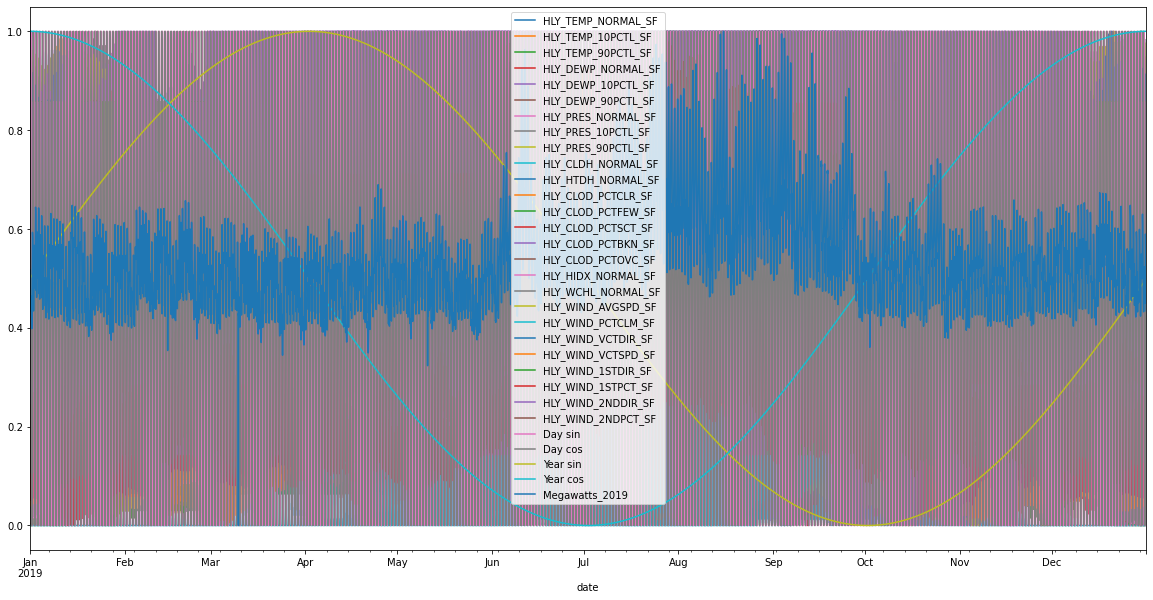

In [57]:
df.columns
df.plot(use_index=True, figsize=(20,10))
plt.show()

### Circular Time

Representing in seconds doesn't show how close December 31st is to January 1st. Code below wraps time around in a circle. 

In [58]:
df['Seconds'] = df.index.map(pd.Timestamp.timestamp)
df

,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,HLY_CLDH_NORMAL_SF,...,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Day sin,Day cos,Year sin,Year cos,Megawatts_2019,Seconds
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.092664,0.188889,0.030201,0.131034,0.155,0.090909,0.816327,0.478261,0.862595,0.0,...,0.571429,0.052863,0.428571,0.202667,0.500000,1.000000,0.501011,1.000000,0.517104,1.546301e+09
2019-01-01 01:00:00,0.081081,0.148148,0.030201,0.124138,0.155,0.090909,0.795918,0.405797,0.854962,0.0,...,0.428571,0.051395,0.571429,0.170667,0.629410,0.982963,0.501369,0.999999,0.455968,1.546304e+09
2019-01-01 02:00:00,0.046332,0.114815,0.000000,0.089655,0.155,0.090909,0.806122,0.434783,0.854962,0.0,...,0.428571,0.054332,0.714286,0.154667,0.750000,0.933013,0.501727,0.999998,0.442268,1.546308e+09
2019-01-01 03:00:00,0.030888,0.074074,0.030201,0.068966,0.100,0.090909,0.806122,0.434783,0.862595,0.0,...,0.428571,0.076358,0.571429,0.181333,0.853553,0.853553,0.502086,0.999997,0.434508,1.546312e+09
2019-01-01 04:00:00,0.015444,0.033333,0.000000,0.062069,0.100,0.090909,0.785714,0.333333,0.839695,0.0,...,0.428571,0.066079,0.857143,0.120000,0.933013,0.750000,0.502444,0.999995,0.435255,1.546315e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.196911,0.292593,0.093960,0.179310,0.200,0.181818,0.755102,0.362319,0.824427,0.0,...,0.857143,0.165932,0.428571,0.194667,0.017037,0.629410,0.497133,0.999993,0.566473,1.577819e+09
2019-12-31 20:00:00,0.177606,0.259259,0.063758,0.158621,0.200,0.181818,0.775510,0.434783,0.839695,0.0,...,0.857143,0.096916,0.428571,0.189333,0.066987,0.750000,0.497491,0.999995,0.544774,1.577822e+09
2019-12-31 21:00:00,0.158301,0.259259,0.063758,0.151724,0.155,0.090909,0.795918,0.405797,0.854962,0.0,...,0.857143,0.111601,0.428571,0.261333,0.146447,0.853553,0.497850,0.999996,0.524462,1.577826e+09


In [59]:
day = 60 * 60 * 24 #60 s in a min, 60 min in an hour, 24 hours in a day
year = 365.2425*day #num seconds in a year
df['Day sin'] = np.sin(df['Seconds']*2*(np.pi/day))
df['Day cos'] = np.cos(df['Seconds']*2*(np.pi/day))
df['Year sin'] = np.sin(df['Seconds']*2*(np.pi/year))
df['Year cos'] = np.cos(df['Seconds']*2*(np.pi/year))

df = df.drop('Seconds', axis = 1)
df

,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,HLY_CLDH_NORMAL_SF,...,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Day sin,Day cos,Year sin,Year cos,Megawatts_2019
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.092664,0.188889,0.030201,0.131034,0.155,0.090909,0.816327,0.478261,0.862595,0.0,...,0.054455,0.571429,0.052863,0.428571,0.202667,-5.030095e-12,1.000000,0.002021,0.999998,0.517104
2019-01-01 01:00:00,0.081081,0.148148,0.030201,0.124138,0.155,0.090909,0.795918,0.405797,0.854962,0.0,...,0.059406,0.428571,0.051395,0.571429,0.170667,2.588190e-01,0.965926,0.002738,0.999996,0.455968
2019-01-01 02:00:00,0.046332,0.114815,0.000000,0.089655,0.155,0.090909,0.806122,0.434783,0.854962,0.0,...,0.044554,0.428571,0.054332,0.714286,0.154667,5.000000e-01,0.866025,0.003455,0.999994,0.442268
2019-01-01 03:00:00,0.030888,0.074074,0.030201,0.068966,0.100,0.090909,0.806122,0.434783,0.862595,0.0,...,0.054455,0.428571,0.076358,0.571429,0.181333,7.071068e-01,0.707107,0.004172,0.999991,0.434508
2019-01-01 04:00:00,0.015444,0.033333,0.000000,0.062069,0.100,0.090909,0.785714,0.333333,0.839695,0.0,...,0.039604,0.428571,0.066079,0.857143,0.120000,8.660254e-01,0.500000,0.004888,0.999988,0.435255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.196911,0.292593,0.093960,0.179310,0.200,0.181818,0.755102,0.362319,0.824427,0.0,...,0.094059,0.857143,0.165932,0.428571,0.194667,-9.659258e-01,0.258819,-0.005734,0.999984,0.566473
2019-12-31 20:00:00,0.177606,0.259259,0.063758,0.158621,0.200,0.181818,0.775510,0.434783,0.839695,0.0,...,0.059406,0.857143,0.096916,0.428571,0.189333,-8.660254e-01,0.500000,-0.005017,0.999987,0.544774
2019-12-31 21:00:00,0.158301,0.259259,0.063758,0.151724,0.155,0.090909,0.795918,0.405797,0.854962,0.0,...,0.064356,0.857143,0.111601,0.428571,0.261333,-7.071068e-01,0.707107,-0.004301,0.999991,0.524462


In [60]:
cols = list(df.columns)
print(cols)
cols = ['HLY_TEMP_NORMAL_SF', 'HLY_TEMP_10PCTL_SF', 'HLY_TEMP_90PCTL_SF', 'HLY_DEWP_NORMAL_SF', 
        'HLY_DEWP_10PCTL_SF', 'HLY_DEWP_90PCTL_SF', 'HLY_PRES_NORMAL_SF', 'HLY_PRES_10PCTL_SF', 
        'HLY_PRES_90PCTL_SF', 'HLY_CLDH_NORMAL_SF', 'HLY_HTDH_NORMAL_SF', 'HLY_CLOD_PCTCLR_SF', 
        'HLY_CLOD_PCTFEW_SF', 'HLY_CLOD_PCTSCT_SF', 'HLY_CLOD_PCTBKN_SF', 'HLY_CLOD_PCTOVC_SF', 
        'HLY_HIDX_NORMAL_SF', 'HLY_WCHL_NORMAL_SF', 'HLY_WIND_AVGSPD_SF', 'HLY_WIND_PCTCLM_SF', 
        'HLY_WIND_VCTDIR_SF', 'HLY_WIND_VCTSPD_SF', 'HLY_WIND_1STDIR_SF', 'HLY_WIND_1STPCT_SF', 
        'HLY_WIND_2NDDIR_SF', 'HLY_WIND_2NDPCT_SF', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Megawatts_2019']
df = df[cols]
df

['HLY_TEMP_NORMAL_SF', 'HLY_TEMP_10PCTL_SF', 'HLY_TEMP_90PCTL_SF', 'HLY_DEWP_NORMAL_SF', 'HLY_DEWP_10PCTL_SF', 'HLY_DEWP_90PCTL_SF', 'HLY_PRES_NORMAL_SF', 'HLY_PRES_10PCTL_SF', 'HLY_PRES_90PCTL_SF', 'HLY_CLDH_NORMAL_SF', 'HLY_HTDH_NORMAL_SF', 'HLY_CLOD_PCTCLR_SF', 'HLY_CLOD_PCTFEW_SF', 'HLY_CLOD_PCTSCT_SF', 'HLY_CLOD_PCTBKN_SF', 'HLY_CLOD_PCTOVC_SF', 'HLY_HIDX_NORMAL_SF', 'HLY_WCHL_NORMAL_SF', 'HLY_WIND_AVGSPD_SF', 'HLY_WIND_PCTCLM_SF', 'HLY_WIND_VCTDIR_SF', 'HLY_WIND_VCTSPD_SF', 'HLY_WIND_1STDIR_SF', 'HLY_WIND_1STPCT_SF', 'HLY_WIND_2NDDIR_SF', 'HLY_WIND_2NDPCT_SF', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Megawatts_2019']


,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,HLY_CLDH_NORMAL_SF,...,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Day sin,Day cos,Year sin,Year cos,Megawatts_2019
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.092664,0.188889,0.030201,0.131034,0.155,0.090909,0.816327,0.478261,0.862595,0.0,...,0.054455,0.571429,0.052863,0.428571,0.202667,-5.030095e-12,1.000000,0.002021,0.999998,0.517104
2019-01-01 01:00:00,0.081081,0.148148,0.030201,0.124138,0.155,0.090909,0.795918,0.405797,0.854962,0.0,...,0.059406,0.428571,0.051395,0.571429,0.170667,2.588190e-01,0.965926,0.002738,0.999996,0.455968
2019-01-01 02:00:00,0.046332,0.114815,0.000000,0.089655,0.155,0.090909,0.806122,0.434783,0.854962,0.0,...,0.044554,0.428571,0.054332,0.714286,0.154667,5.000000e-01,0.866025,0.003455,0.999994,0.442268
2019-01-01 03:00:00,0.030888,0.074074,0.030201,0.068966,0.100,0.090909,0.806122,0.434783,0.862595,0.0,...,0.054455,0.428571,0.076358,0.571429,0.181333,7.071068e-01,0.707107,0.004172,0.999991,0.434508
2019-01-01 04:00:00,0.015444,0.033333,0.000000,0.062069,0.100,0.090909,0.785714,0.333333,0.839695,0.0,...,0.039604,0.428571,0.066079,0.857143,0.120000,8.660254e-01,0.500000,0.004888,0.999988,0.435255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.196911,0.292593,0.093960,0.179310,0.200,0.181818,0.755102,0.362319,0.824427,0.0,...,0.094059,0.857143,0.165932,0.428571,0.194667,-9.659258e-01,0.258819,-0.005734,0.999984,0.566473
2019-12-31 20:00:00,0.177606,0.259259,0.063758,0.158621,0.200,0.181818,0.775510,0.434783,0.839695,0.0,...,0.059406,0.857143,0.096916,0.428571,0.189333,-8.660254e-01,0.500000,-0.005017,0.999987,0.544774
2019-12-31 21:00:00,0.158301,0.259259,0.063758,0.151724,0.155,0.090909,0.795918,0.405797,0.854962,0.0,...,0.064356,0.857143,0.111601,0.428571,0.261333,-7.071068e-01,0.707107,-0.004301,0.999991,0.524462


# Step 3: Train, validation, test

In [61]:
#EX: X has [48.8, 44.1, 54.0, ... , 0.999998] -> y[252485] (energy consumption data)
#this function is from : https://www.youtube.com/watch?v=kGdbPnMCdOg
def df_to_X_y(df, megawattsPos, window_size= 1): #1 day of feature data
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-1):
        row = [ r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][megawattsPos] 
        y.append(label)
    return np.array(X), np.array(y)

In [62]:
megawattsPos = 30
X, y = df_to_X_y(df, megawattsPos, 1) 
X.shape, y.shape


((8759, 1, 31), (8759,))

In [63]:
numInputs = X.shape[2]
print("The number of data variable inputs: ", numInputs)

The number of data variable inputs:  31


In [64]:
X

array([[[ 0.09266409,  0.18888889,  0.03020134, ...,  0.00202132,
          0.99999796,  0.51710393]],

       [[ 0.08108108,  0.14814815,  0.03020134, ...,  0.00273811,
          0.99999625,  0.45596759]],

       [[ 0.04633205,  0.11481481,  0.        , ...,  0.00345488,
          0.99999403,  0.44226797]],

       ...,

       [[ 0.17760618,  0.25925926,  0.06375839, ..., -0.00501746,
          0.99998741,  0.54477388]],

       [[ 0.15830116,  0.25925926,  0.06375839, ..., -0.00430068,
          0.99999075,  0.52446179]],

       [[ 0.13127413,  0.22222222,  0.03020134, ..., -0.0035839 ,
          0.99999358,  0.50076403]]])

In [65]:
train_percent = 0.9
validation_percent = 0.1

train_percent_split = int(train_percent * len(X))
validation_percent_split = int(validation_percent * len(X)) + train_percent_split
print(validation_percent_split)

X_train, y_train = X[:train_percent_split], y[:train_percent_split]
X_val, y_val = X[train_percent_split:validation_percent_split], y[train_percent_split:validation_percent_split] #validation

# just gonna have it hold like 1 day of prev data 
testData = 8760 - 2
X_test, y_test = X[testData:], y[testData:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

8758


((7883, 1, 31), (7883,), (875, 1, 31), (875,), (1, 1, 31), (1,))

In [66]:
print(X_test)
print(y_test)

[[[ 0.13127413  0.22222222  0.03020134  0.14482759  0.155
    0.09090909  0.81632653  0.47826087  0.8778626   0.
    0.81621622  0.49878935  0.12418301  0.12890625  0.49038462
    0.62409639  0.13127413  0.14028777  0.10650888  0.69230769
    0.57938719  0.05445545  0.42857143  0.10132159  0.85714286
    0.216      -0.5         0.8660254  -0.0035839   0.99999358
    0.50076403]]]
[0.43459234]


# Step 4: Create a basic LSTM

https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af

1. Number of Layers: Start with two hidden layers (this does not include the last layer).

>So model will look like: input layer, 2 hidden layers, 1 output layer

>input layer is first LSTM

>2 hidden layers is 2 dense layers

>output layer is also another dense layer

2. Number of nodes (size) of intermediate layers: a number from the geometric progression of 2, e.g., 4, 8, 16, 32, … . The first layer should be around half of the number of input data features. The next layer size as half of the previous.

> 64

> 32

3. Size of output layer for regression: If single response then the size one. For multi-response regression, the size is the number of responses.

> 1

4. Activation for intermediate layers: Use relu activation.

>relu

5. Activation for output layer: Use sigmoid for binary classification, softmax for multi-class classifier, and linear for regression. For Autoencoders, the last layer should be linear if the input data is continuous, otherwise, sigmoid or softmax for binary or multi-level categorical input.

>linear

6. Dropout layers: Add Dropout after every layer, except the Input layer (if defining the Input layer separately). Set Dropout rate to 0.5. Dropout rate > 0.5 is counter-productive. If you believe a rate of 0.5 is regularizing too many nodes, then increase the size of the layer instead of reducing the Dropout rate to less than 0.5. I prefer to not set any Dropout on the Input layer. But if you feel compelled to do that, set the Dropout rate < 0.2.

> Skip

7. Data preprocessing: I am assuming your predictors X is numeric and you have already converted any categorical columns into one-hot-encoding. Before using the data for model training, perform data scaling. UseMinMaxScaler from sklearn.preprocessing. If this does not work well, do StandardScaler present in the same library. The scaling is needed for y in regression.

> MinMaxScaler

8. Split data to train, valid, test: Use train_test_split from sklearn.model_selection. See example below.

>Done!

9. Class weights: If you have unbalanced data, then set class weights to balance the loss in your model.fit . For a binary classifier, the weights should be: {0: number of 1s / data size, 1: number of 0s / data size}. For extremely unbalanced data (rare events), class weight may not work. Be cautious adding it.

>Skip

10. Optimizer: Use adam with its default learning rate.

>adam optimizer

11. Loss in regression: Use mse.

>mse

12. Metric for Regression: Use tf.keras.metrics.RootMeanSquaredError().

>rmse

13. Epochs: Start with 20 to see if the model training shows decreasing loss and any improvement in accuracy. If there is no minimal success with 20 epochs, move on. If you get some minimal success, make epoch as 100.

>20 epochs

14. Batch size: Choose the batch size from the geometric progression of 2. For unbalanced datasets have larger value, like 128, otherwise start with 16.

>16


In [67]:
### Create the basic LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [68]:
model = Sequential()
model.add(LSTM(64,input_shape=(X_train.shape[1],X_train.shape[2]))) # input layer; 31 data inputs, 1 step (1 hr)
model.add(Dense(32, 'relu')) #hidden layer 1
model.add(Dense(32, 'relu')) #hidden layer 2
model.add(Dense(1, 'linear')) #output layer

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                24576     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 27,745
Trainable params: 27,745
Non-trainable params: 0
_________________________________________________________________


### <Don't care about> Optimal epochs, at least for basic model

https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/

In [22]:
# from keras import callbacks
# from tensorflow.keras.losses import MeanSquaredError

# model.compile(loss = MeanSquaredError(), optimizer ="rmsprop", metrics = ['accuracy'])
# earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 5, 
#                                         restore_best_weights = True, verbose = 1)
  
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 48, 
#                     epochs = 35, 
#                     callbacks =[earlystopping])

In [23]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from keras import callbacks
from tensorflow.keras.losses import MeanSquaredError

storeModel = '/Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model'
cp = ModelCheckpoint(storeModel, save_best_only = True) #I want to only save the best model (lowest validation loss)
model.compile(loss = MeanSquaredError(), optimizer = Adam(), metrics = [RootMeanSquaredError()])

In [24]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 20, callbacks = [cp])

Epoch 1/20
220/247 [=========================>....] - ETA: 0s - loss: 0.0103 - root_mean_squared_error: 0.1016

2022-03-15 14:00:37.813158: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


247/247 [==============================] - 5s 15ms/step - loss: 0.0095 - root_mean_squared_error: 0.0974 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 2/20
247/247 [==============================] - 0s 2ms/step - loss: 0.0018 - root_mean_squared_error: 0.0424 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0393
Epoch 3/20
233/247 [===========================>..] - ETA: 0s - loss: 8.9898e-04 - root_mean_squared_error: 0.0300

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


247/247 [==============================] - 3s 13ms/step - loss: 8.7862e-04 - root_mean_squared_error: 0.0296 - val_loss: 5.7718e-04 - val_root_mean_squared_error: 0.0240
Epoch 4/20
230/247 [==========================>...] - ETA: 0s - loss: 5.7358e-04 - root_mean_squared_error: 0.0239

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


247/247 [==============================] - 3s 14ms/step - loss: 5.6579e-04 - root_mean_squared_error: 0.0238 - val_loss: 5.6093e-04 - val_root_mean_squared_error: 0.0237
Epoch 5/20
229/247 [==========================>...] - ETA: 0s - loss: 5.1918e-04 - root_mean_squared_error: 0.0228

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


247/247 [==============================] - 3s 13ms/step - loss: 5.1575e-04 - root_mean_squared_error: 0.0227 - val_loss: 4.9039e-04 - val_root_mean_squared_error: 0.0221
Epoch 6/20
232/247 [===========================>..] - ETA: 0s - loss: 4.6910e-04 - root_mean_squared_error: 0.0217

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


247/247 [==============================] - 3s 14ms/step - loss: 4.6343e-04 - root_mean_squared_error: 0.0215 - val_loss: 3.5147e-04 - val_root_mean_squared_error: 0.0187
Epoch 7/20
247/247 [==============================] - 0s 2ms/step - loss: 4.8139e-04 - root_mean_squared_error: 0.0219 - val_loss: 5.4509e-04 - val_root_mean_squared_error: 0.0233
Epoch 8/20
247/247 [==============================] - 0s 2ms/step - loss: 4.7083e-04 - root_mean_squared_error: 0.0217 - val_loss: 3.5346e-04 - val_root_mean_squared_error: 0.0188
Epoch 9/20
247/247 [==============================] - 0s 2ms/step - loss: 4.2148e-04 - root_mean_squared_error: 0.0205 - val_loss: 3.7313e-04 - val_root_mean_squared_error: 0.0193
Epoch 10/20
231/247 [===========================>..] - ETA: 0s - loss: 3.9918e-04 - root_mean_squared_error: 0.0200

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


247/247 [==============================] - 3s 13ms/step - loss: 3.9696e-04 - root_mean_squared_error: 0.0199 - val_loss: 2.5179e-04 - val_root_mean_squared_error: 0.0159
Epoch 11/20
247/247 [==============================] - 0s 2ms/step - loss: 3.8089e-04 - root_mean_squared_error: 0.0195 - val_loss: 3.1372e-04 - val_root_mean_squared_error: 0.0177
Epoch 12/20
247/247 [==============================] - 0s 2ms/step - loss: 4.0940e-04 - root_mean_squared_error: 0.0202 - val_loss: 2.9868e-04 - val_root_mean_squared_error: 0.0173
Epoch 13/20
247/247 [==============================] - 0s 2ms/step - loss: 3.7222e-04 - root_mean_squared_error: 0.0193 - val_loss: 2.6776e-04 - val_root_mean_squared_error: 0.0164
Epoch 14/20
247/247 [==============================] - 0s 2ms/step - loss: 3.4431e-04 - root_mean_squared_error: 0.0186 - val_loss: 2.6684e-04 - val_root_mean_squared_error: 0.0163
Epoch 15/20
247/247 [==============================] - 0s 2ms/step - loss: 3.0117e-04 - root_mean_squared_

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/LSTM-BasicModel/model/assets


247/247 [==============================] - 3s 13ms/step - loss: 3.0352e-04 - root_mean_squared_error: 0.0174 - val_loss: 2.0409e-04 - val_root_mean_squared_error: 0.0143
Epoch 17/20
247/247 [==============================] - 1s 2ms/step - loss: 2.6420e-04 - root_mean_squared_error: 0.0163 - val_loss: 3.9539e-04 - val_root_mean_squared_error: 0.0199
Epoch 18/20
247/247 [==============================] - 0s 2ms/step - loss: 3.0105e-04 - root_mean_squared_error: 0.0174 - val_loss: 2.7317e-04 - val_root_mean_squared_error: 0.0165
Epoch 19/20
247/247 [==============================] - 0s 2ms/step - loss: 2.6064e-04 - root_mean_squared_error: 0.0161 - val_loss: 2.0814e-04 - val_root_mean_squared_error: 0.0144
Epoch 20/20
247/247 [==============================] - 0s 2ms/step - loss: 2.7745e-04 - root_mean_squared_error: 0.0167 - val_loss: 3.0386e-04 - val_root_mean_squared_error: 0.0174


In [25]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,0.454908,0.455968
1,0.435447,0.442268
2,0.440712,0.434508
3,0.453839,0.435255
4,0.475523,0.446068
...,...,...
7878,0.548981,0.533983
7879,0.528067,0.525647
7880,0.512699,0.506884
7881,0.489699,0.492918


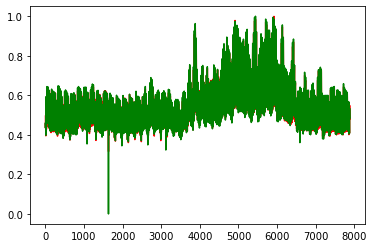

In [26]:
plt.plot(train_results['Train Predictions'][:], color = 'red')
plt.plot(train_results['Actuals'][:], color = 'green')

In [27]:
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data = {'Val Predictions': val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,0.474190,0.488834
1,0.483307,0.499026
2,0.503461,0.516143
3,0.528373,0.540288
4,0.555626,0.575731
...,...,...
870,0.592835,0.587197
871,0.580836,0.566473
872,0.552699,0.544774
873,0.517870,0.524462


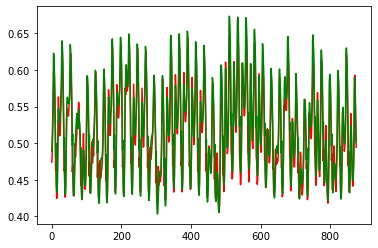

In [28]:
plt.plot(val_results['Val Predictions'][:], color = 'red')
plt.plot(val_results['Actuals'][:], color = 'green')